In [2]:
# mini-batch Kmeans
# DBscan
import pandas as pd
import numpy as np

In [3]:
AllData = pd.read_csv("combined_data.csv")
AllData.head()

,Unnamed: 0,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,0,False,/lxD5ak7BOoinRNehOCA85CQ8ubr.jpg,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 12, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,...,1995-10-30,373554033,81,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,Toy Story,False,7.967,16498
1,1,False,/pYw10zrqfkdm3yD9JTO6vEGQhKy.jpg,"{'id': 495527, 'name': 'Jumanji Collection', '...",65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://www.sonypictures.com/movies/jumanji/,8844,tt0113497,en,...,1995-12-15,262821940,104,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Roll the dice and unleash the excitement!,Jumanji,False,7.200,9505
2,2,False,/1J4Z7VhdAgtdd97nCxY7dcBpjGT.jpg,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",25000000,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,...,1995-12-22,71500000,101,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.500,324
3,3,False,/jZjoEKXMTDoZAGdkjhAdJaKtXSN.jpg,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,...,1995-12-22,81452156,127,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.262,130
4,4,False,/lEsjVrGU21BeJjF5AF9EWsihDpw.jpg,"{'id': 96871, 'name': 'Father of the Bride (St...",0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",NaN,11862,tt0113041,en,...,1995-12-08,76594107,106,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,6.200,635


In [4]:
# Get relevant data
data = AllData[['original_title', 'genres' ,'overview']]
data.head()

,original_title,genres,overview
0,Toy Story,"[{'id': 16, 'name': 'Animation'}, {'id': 12, '...","Led by Woody, Andy's toys live happily in his ..."
1,Jumanji,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",When siblings Judy and Peter discover an encha...
2,Grumpier Old Men,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",A family wedding reignites the ancient feud be...
3,Waiting to Exhale,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","Cheated on, mistreated and stepped on, the wom..."
4,Father of the Bride Part II,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",Just when George Banks has recovered from his ...


In [5]:
import re
import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords

# Remove all non-letters (maybe take a look at this)
data['overview2'] = [re.findall(r'[a-zA-Z0–9_]+',letter.lower()) for letter in data['overview'].fillna('NONE')]
data.head()

# Remove stopwords
stopwords = stopwords.words("English")

list_of_overviews = []
for description in data['overview2']:
    new_overview = []
    for word in description:
        if word not in stopwords:
            new_overview.append(word)

    list_of_overviews.append(new_overview)

data['overview2'] = list_of_overviews

# Lemmatize words - pull roots
nltk.download('wordnet')
nltk.download('words')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

list_of_overviews = []
for description in data['overview2']:
    new_overview = []
    for word in description:
        if word not in stopwords:
            new_overview.append(lemmatizer.lemmatize(word, pos = "v"))

    list_of_overviews.append(new_overview)

data['overview2'] = list_of_overviews

data['overview2'] = [' '.join(i) for i in data['overview2']]

data[['overview', 'overview2']].head()


/Users/spencerkarp/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Users/spencerkarp/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/spencerkarp/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     /Users/spencerkarp/nltk_data...
[nltk_data]   Package words is already up-to-da

,overview,overview2
0,"Led by Woody, Andy's toys live happily in his ...",lead woody andy toy live happily room andy bir...
1,When siblings Judy and Peter discover an encha...,siblings judy peter discover enchant board gam...
2,A family wedding reignites the ancient feud be...,family wed reignite ancient feud next door nei...
3,"Cheated on, mistreated and stepped on, the wom...",cheat mistreat step women hold breath wait elu...
4,Just when George Banks has recovered from his ...,george bank recover daughter wed receive news ...


In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizor = TfidfVectorizer(analyzer='word') # ngram_range=(1))

tfidf_matrices = vectorizor.fit_transform(data['overview2'])


In [27]:
tfidf_matrices

<61583x69149 sparse matrix of type '<class 'numpy.float64'>'
	with 1622985 stored elements in Compressed Sparse Row format>

In [28]:
df = pd.DataFrame(tfidf_matrices[0].T.todense(), index=vectorizor.get_feature_names(), columns=["TF-IDF"])
df = df.sort_values('TF-IDF', ascending=False)

df.head()

,TF-IDF
buzz,0.499755
woody,0.495907
andy,0.417806
lightyear,0.204688
aside,0.147068


In [9]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


sse = []
sil = []
for k in range(1, 11):
  print("Run " + str(k) + " begining now...")
  kmeans = KMeans(n_clusters = k).fit(tfidf_matrices)
  centroids = kmeans.cluster_centers_
  pred_clusters = kmeans.predict(tfidf_matrices)
  curr_sse = 0

  if k > 1:
    # For sillouette score
    labels = kmeans.labels_
    sil.append(silhouette_score(tfidf_matrices, labels, metric = 'euclidean'))
    
  # calculate square of Euclidean distance of each point from its cluster center and add to current WSS
  for i in range(len(tfidf_matrices[:,0].todense())):
    curr_center = centroids[pred_clusters[i]]
    curr_sse += (tfidf_matrices[i, 0] - curr_center[0]) ** 2 + (tfidf_matrices[i, 1] - curr_center[1]) ** 2
      
  sse.append(curr_sse)

  print("Run " + str(k) + " finished.")
    

Run 1 begining now...
Run 1 finished.
Run 2 begining now...
Run 2 finished.
Run 3 begining now...
Run 3 finished.
Run 4 begining now...
Run 4 finished.
Run 5 begining now...
Run 5 finished.
Run 6 begining now...
Run 6 finished.
Run 7 begining now...
Run 7 finished.
Run 8 begining now...
Run 8 finished.
Run 9 begining now...
Run 9 finished.
Run 10 begining now...
Run 10 finished.


<function matplotlib.pyplot.show(*args, **kw)>

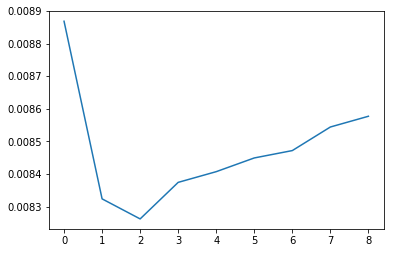

In [23]:
import matplotlib.pyplot as plt

plt.plot(sil)
plt.show
# plt.plot(sil)
# plt.show

In [20]:
sse

[3.993878389316214,
 3.9934267001667068,
 3.9834242292524538,
 3.9818151351926456,
 3.947526723300641,
 3.95259367178678,
 3.9500760485267756,
 3.9581981321590334,
 3.9689630006168177,
 3.9572159391431994]

In [21]:
sil

[0.008868755059830986,
 0.008323695759976686,
 0.008262168179127593,
 0.008374318355077601,
 0.008407180782749586,
 0.008449253492603346,
 0.008471871644474402,
 0.008544211754605414,
 0.008577187567592098]

In [8]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

sse = []
sil = []

kmeans = KMeans(n_clusters = 3).fit(tfidf_matrices)
centroids = kmeans.cluster_centers_
pred_clusters = kmeans.predict(tfidf_matrices)
curr_sse = 0


labels = kmeans.labels_
sil.append(silhouette_score(tfidf_matrices, labels, metric = 'euclidean'))
    
# calculate square of Euclidean distance of each point from its cluster center and add to current WSS
for i in range(len(tfidf_matrices)):
    curr_center = centroids[pred_clusters[i]]
    curr_sse += (tfidf_matrices[i, 0] - curr_center[0]) ** 2 + (tfidf_matrices[i, 1] - curr_center[1]) ** 2
      
sse.append(curr_sse)

print(sse)
print(sil)

TypeError: sparse matrix length is ambiguous; use getnnz() or shape[0]

In [54]:
from sklearn.cluster import KMeans

# initialize kmeans
kmeans = KMeans(n_clusters=20, random_state=42)
# fit the model
kmeans.fit(tfidf_matrices) # Takes 50 mins
# store cluster labels in a variable
clusters = kmeans.labels_

# Takes 50 mins
clusters

array([13,  5, 13, ..., 13, 11,  8], dtype=int32)

In [57]:
clusters.size

61583

In [60]:
data['cluster'] = clusters

/Users/spencerkarp/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [64]:
data.loc[data['cluster']==13].head()

,original_title,genres,overview,overview2,cluster
0,Toy Story,"[{'id': 16, 'name': 'Animation'}, {'id': 12, '...","Led by Woody, Andy's toys live happily in his ...",lead woody andy toy live happily room andy bir...,13
2,Grumpier Old Men,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",A family wedding reignites the ancient feud be...,family wed reignite ancient feud next door nei...,13
4,Father of the Bride Part II,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",Just when George Banks has recovered from his ...,george bank recover daughter wed receive news ...,13
6,Sabrina,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",An ugly duckling having undergone a remarkable...,ugly duckling undergo remarkable change still ...,13
8,Sudden Death,"[{'id': 28, 'name': 'Action'}]",When a man's daughter is suddenly taken during...,man daughter suddenly take championship hockey...,13


In [67]:
summary = data.groupby('cluster')['original_title'].count()
summary

cluster
0      3193
1      2004
2       505
3      3427
4      2392
5      3655
6      1471
7      2122
8      4663
9      2653
10      533
11     1307
12     3602
13    17163
14     3408
15      677
16     1580
17     1730
18     3108
19     2390
Name: original_title, dtype: int64

In [43]:
from sklearn.metrics.pairwise import linear_kernel
cos_sims = []
for m in tfidf_matrices:
    cos_sims.append(linear_kernel(m, m))

cos_sims

[array([[1.]]),
 array([[1.]]),
 array([[1.]]),
 array([[1.]]),
 array([[1.]]),
 array([[1.]]),
 array([[1.]]),
 array([[1.]]),
 array([[1.]]),
 array([[1.]]),
 array([[1.]]),
 array([[1.]]),
 array([[1.]]),
 array([[1.]]),
 array([[1.]]),
 array([[1.]]),
 array([[1.]]),
 array([[1.]]),
 array([[1.]]),
 array([[1.]]),
 array([[1.]]),
 array([[1.]]),
 array([[1.]]),
 array([[1.]]),
 array([[1.]]),
 array([[1.]]),
 array([[1.]]),
 array([[1.]]),
 array([[1.]]),
 array([[1.]]),
 array([[1.]]),
 array([[1.]]),
 array([[1.]]),
 array([[1.]]),
 array([[1.]]),
 array([[1.]]),
 array([[1.]]),
 array([[1.]]),
 array([[1.]]),
 array([[1.]]),
 array([[1.]]),
 array([[1.]]),
 array([[1.]]),
 array([[1.]]),
 array([[1.]]),
 array([[1.]]),
 array([[1.]]),
 array([[1.]]),
 array([[1.]]),
 array([[1.]]),
 array([[1.]]),
 array([[1.]]),
 array([[1.]]),
 array([[1.]]),
 array([[1.]]),
 array([[1.]]),
 array([[1.]]),
 array([[1.]]),
 array([[1.]]),
 array([[1.]]),
 array([[1.]]),
 array([[1.]]),
 array([